In [1]:
 '''
 TWO:
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining
'''

'\nTWO:\n1) Extract reviews of any product from ecommerce website like amazon\n2) Perform emotion mining\n'

In [52]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
#from selenium import webdriver

In [53]:
import requests
from bs4 import BeautifulSoup as bs


In [87]:
watch_reviews=[]


In [88]:
#downloading reviews from Amazon 
for i in range (1,30):
  op=[]
  url ="https://www.amazon.in/Noise-ColorFit-Bluetooth-Fully-Functional-Brightness/product-reviews/B09ZQK9X8G/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")
  reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  watch_reviews = watch_reviews+op



In [98]:
watch_reviews=list(set(watch_reviews))
watch_reviews

['',
 '\nIts a nice watch in the price range\n',
 '\nGood watch with all facilities including BT calling but the prize is a lot but high\n',
 '\nGood product and worth buying\n',
 '\nGood product\n',
 "\n1. Please add app gallery when we do right to left swap on home screen. Because right to left swap or left to right swap have same pages.2. It should ring instead of vibrate in alarm or you can give it optional depends  on user.3. The temperature doesn't sync fast I have to go in the noisefit app  again and again and do it on and off in weather settings to sync feels like jugad. All these things can be fix from updates so pls try to do it\n",
 "\nThe watch has good capabilities. I don't have a sureshot way to measure it's accuracy, so will leave it at that without making any judgements. It tracks activities, bluetooth calling is decent and touchscreen is responsive.Update: Downgraded to 4 stars as the measurements are off. If you keep the continuous monitoring on, It'll keep taking ran

In [99]:
txt_upd = ' '.join(watch_reviews)


In [100]:
txt_upd=txt_upd.lower()


In [101]:

'''
from collections import Counter 

skips = [".", ", ", ":", ";", "'", '"',"\n"]
for ch in skips:
  txt_upd = txt_upd.replace(ch, "") 
  #word_counts = Counter(txt_upd.split(" "))
  #return word_counts
txt_upd
'''

txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [103]:
import nltk
nltk.download('punkt')
text_tokens = word_tokenize(txt_upd)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [106]:
nltk.download('stopwords')
tokens_without_sw = [word for word in text_tokens if not word in stopwords.words()]
tokens_without_sw

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['nice',
 'watch',
 'price',
 'range',
 'watch',
 'facilities',
 'including',
 'bt',
 'calling',
 'prize',
 'lot',
 'high',
 'product',
 'worth',
 'buying',
 'product',
 'add',
 'app',
 'gallery',
 'left',
 'swap',
 'home',
 'screen',
 'left',
 'swap',
 'left',
 'swap',
 'pages',
 'ring',
 'instead',
 'vibrate',
 'alarm',
 'give',
 'optional',
 'depends',
 'user',
 'temperature',
 'sync',
 'fast',
 'noisefit',
 'app',
 'weather',
 'settings',
 'sync',
 'feels',
 'jugad',
 'things',
 'fix',
 'updates',
 'pls',
 'watch',
 'capabilities',
 'sureshot',
 'measure',
 'accuracy',
 'leave',
 'making',
 'judgements',
 'tracks',
 'activities',
 'bluetooth',
 'calling',
 'decent',
 'touchscreen',
 'responsive',
 'update',
 'downgraded',
 'stars',
 'measurements',
 'continuous',
 'monitoring',
 'taking',
 'random',
 'figures',
 'showed',
 'heartbeat',
 'table',
 'measurements',
 'averages',
 'completely',
 'nice',
 'smart',
 'watch',
 'budget',
 'bt',
 'calling',
 'feature',
 'superb',
 'smart',
 

In [107]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(tokens_without_sw)


In [108]:
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
df =pd.DataFrame(denselist, columns=feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [109]:
word_list = ' '.join(df)


In [110]:
wordcloud = WordCloud(background_color='black',
                      width=1800,
                      height=1400).generate(word_list)

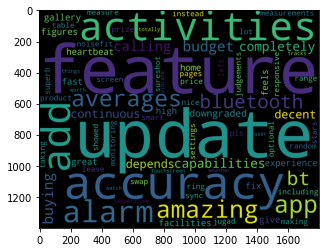

In [111]:
plt.imshow(wordcloud)


In [124]:
#sentimental analysis
from google.colab import files
upload=files.upload()


Saving negative-words.txt to negative-words (1).txt


In [123]:
positive_words = pd.read_fwf("positive-words (2).txt")
positive_words

,a+
0,abound
1,abounds
2,abundance
3,abundant
4,accessable
...,...
2000,youthful
2001,zeal
2002,zenith
2003,zest


In [127]:
negative_words = pd.read_fwf("negative-words (1).txt",encoding="ISO-8859-1")
negative_words

,2-faced
0,2-faces
1,abnormal
2,abolish
3,abominable
4,abominably
...,...
4777,zaps
4778,zealot
4779,zealous
4780,zealously


In [140]:
negative_words.values

array([['2-faces'],
       ['abnormal'],
       ['abolish'],
       ...,
       ['zealous'],
       ['zealously'],
       ['zombie']], dtype=object)

In [142]:
txt_neg_in_nw = ' '.join([word for word in df.columns if word in negative_words.values])
'''
for word in df.columns:
  if word in positive_words.values:
    print(word)
'''
txt_neg_in_nw

'alarm vibrate'

In [143]:
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_neg_in_nw)

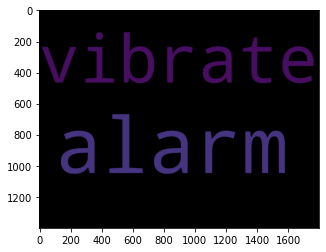

In [144]:
plt.imshow(wordcloud_neg)


In [146]:
txt_pos_in_pw = ' '.join([word for word in df.columns if word in positive_words.values])


In [147]:
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(txt_pos_in_pw)

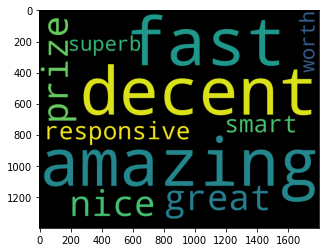

In [148]:
plt.imshow(wordcloud_pos)
